In [1]:
import cv2
import os
import math
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from keras.models import load_model
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,Dropout
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import (
    EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from tensorflow.keras.optimizers import Adam,SGD
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import load_model
import eli5
from tensorflow import compat

In [2]:
IMAGE_WIDTH=224
IMAGE_HEIGHT=224
#Load all patients 
my_data = pd.read_csv('../data/Five_Frames_Per_patient.csv')
patients_data=pd.read_csv('../data/videos_data.csv')
data_array = my_data.to_numpy()
patients_array=patients_data["FileName"].to_numpy()
images_path = '../data/Five_Frames_Per_patient/'
no_of_test_patients=math.floor(patients_array.size*0.2) 
images_data = []
models = []

df=my_data
data_array=df.to_numpy()
for i in data_array:
    img = cv2.imread(images_path + i[0] + '.' + i[2], cv2.IMREAD_GRAYSCALE)
    img=  cv2.equalizeHist(img)
    img = cv2.resize(img, (IMAGE_WIDTH, IMAGE_HEIGHT))
    x=img
    img_2d = img.reshape(IMAGE_WIDTH ,IMAGE_HEIGHT,1)
    images_data.append(img_2d)

X=np.asarray(images_data)
y = np.asarray(my_data['Label'])
print(Counter(y))

testPatient_indexes= [1,2,12,14,15,22,
                      33,34,37,42,43,52,53,
                      92,95,96,99,101,102,104,107,110,115,118]
#getting frame indexes of each patient
frames_index=[]
for i in testPatient_indexes:
  j=i*5
  z=j+5
  while j<z:
    frames_index.append(j)
    j+=1

# Adding the frames to X_test
X_test=np.take(X,frames_index,axis=0)
y_test=np.take(y,frames_index,axis=0)
# Removing the frames from X_train
X_train=np.delete(X,frames_index,axis=0)
y_train=np.delete(y,frames_index,axis=0)

# Scale the pixels
X_train=X_train/255.0
X_test=X_test/255.0

Counter({'regular': 280, 'pneumonia': 180, 'covid': 150})


In [3]:
model = load_model('Conv2d-Better', compile=False)

In [4]:
model.predict(X_test)

array([[2.84811288e-01, 2.37023622e-01, 4.78165090e-01],
       [1.47034198e-01, 2.22877860e-01, 6.30087972e-01],
       [9.09405887e-01, 3.65212001e-03, 8.69420543e-02],
       [1.39615729e-01, 3.85041177e-01, 4.75343049e-01],
       [8.19689393e-01, 1.34898061e-02, 1.66820839e-01],
       [5.40471971e-01, 3.01037997e-01, 1.58490032e-01],
       [7.63376892e-01, 3.33507620e-02, 2.03272402e-01],
       [5.20158350e-01, 3.08181226e-01, 1.71660379e-01],
       [6.56154990e-01, 5.08136824e-02, 2.93031335e-01],
       [8.96358609e-01, 7.76648596e-02, 2.59764791e-02],
       [4.64321971e-01, 2.59217352e-01, 2.76460677e-01],
       [9.36282098e-01, 5.18623777e-02, 1.18555846e-02],
       [9.94066954e-01, 4.69142292e-03, 1.24165905e-03],
       [9.99072313e-01, 8.88436974e-04, 3.91845715e-05],
       [9.95594203e-01, 4.25227173e-03, 1.53591245e-04],
       [9.89677668e-01, 2.90149450e-03, 7.42091937e-03],
       [9.91616070e-01, 1.00459543e-03, 7.37942336e-03],
       [9.76921380e-01, 1.92996

In [5]:
compat.v1.disable_eager_execution()
model = load_model('Conv2d-Better', compile=False)

In [6]:
img=np.asarray([X_test[0]])

In [7]:
f=eli5.show_prediction(model,img)

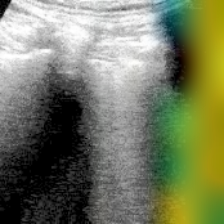

In [8]:
f

In [29]:
from tkinter import *
from PIL import ImageTk, Image

root = Tk()

c = Canvas(root, width=224, height=224)
c.pack()

img = f
c.create_image(x, y, image=img, anchor=NW)

TclError: bad screen distance "[[114 114 114 ... 114 114 114]
 [114 114 114 ... 1"

In [31]:
print(f)

<PIL.Image.Image image mode=RGBA size=224x224 at 0x185A7A95550>


In [ ]:
eli5